# 데이터 탐색

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from glob import glob

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='AppleGothic'  #Mac용
#matplotlib.rcParam['font.family']='Malgun Gothic' 윈도우 용
matplotlib.rcParams['font.size']=15 #글자 크기
matplotlib.rcParams['axes.unicode_minus']=False #한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [4]:
df = pd.read_csv("movie_for_EDA.csv")

In [5]:
df

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
0,파묘,장재현,"(주)쇼박스,(주)엠씨엠씨",etc,(주)쇼박스,장편,한국,2355.0,1.057937e+11,10957317.0,2.481515e+10,2507635.0,미스터리,15세이상관람가,일반영화,2024,2
1,듄: 파트2,드니 빌뇌브,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1544.0,2.194099e+10,1886010.0,8.730581e+09,687149.0,액션,12세이상관람가,일반영화,2024,2
2,댓글부대,안국진,"(주)영화적순간,주식회사 디믹스스튜디오",etc,(주)에이스메이커무비웍스,장편,한국,1228.0,5.042399e+09,541058.0,1.309676e+09,134016.0,범죄,15세이상관람가,일반영화,2024,3
3,웡카,폴 킹,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1753.0,3.390668e+10,3526213.0,9.818367e+09,980128.0,판타지,전체관람가,일반영화,2024,1
4,고질라 X 콩: 뉴 엠파이어,아담 윈가드,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,996.0,3.220813e+09,320982.0,7.506203e+08,69172.0,액션,12세이상관람가,일반영화,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


## 요약본

In [6]:
def resumtable(data):
    summary = pd.DataFrame(data.dtypes).reset_index().rename(columns={"index":"피처", 0:"dtypes"})
    summary["결측치 갯수"] = data.isnull().sum().values
    summary["고윳값 갯수"] = data.nunique().values
    summary["첫번째 값"] = data.iloc[0].values
    summary["두번째 값"] = data.iloc[1].values
    summary["세번째 값"] = data.iloc[2].values
    
    return summary

In [7]:
resumtable(df) # 영화제목 고윳값으로 보면 중복된 데이터 있음 추측

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


## 제작사
- 중복되는 데이터 존재
    - ex) 플러스엠, 메가박스중앙(주)플러스엠
    - ex) 데이드림, 데이드림엔터테인먼트
    - ex) 한국예술종합학교
- 단일제작사뿐 아니라 제작사가 동시에 많이 껴있음
    - 단일 제작보다 동시 제작이 많으면서 일정 제작사는 팀처럼 움직인다.

In [8]:
df["제작사"].unique()

array(['(주)쇼박스,(주)엠씨엠씨', 'etc', '(주)영화적순간,주식회사 디믹스스튜디오', '㈜브레드이발소',
       '다큐스토리', '히스토리 디앤피,(주)디에이치미디어,굿픽처스', '(주)로케트필름', '마름모', '스튜디오설',
       '워킹 타이틀 필름', '퓨어웨이픽쳐스', '(주)베러투모로우,나로픽처스(주)', '(주)안나푸르나필름',
       '아드만 애니메이션즈', '한국영화아카데미', '(주)씨제스엔터테인먼트,페이지원필름(주)', '(주)영화사 그램',
       '(주)로그라인스튜디오', '(주)그노스', '(주)하이브미디어코프', '(주)명필름,(주)시네마6411',
       '파이오니아21', '글뫼 주식회사', '(주)영화사메이플러스', '독바위 프로덕션', '(주)씨제이이엔엠',
       '사보타지 필름', '(주)에스엠엔터테인먼트', '(주)빅스톤픽쳐스', '자루 스튜디오', 'MBC경남',
       '주식회사 필름영', '(주)지브라더스 컴퍼니,한류닷컴 주식회사', '바투 필름', '(주)케이퍼필름',
       '영화제작소 숲길', '(주)니즈텔레콤', '요지경필름', '(주)기린제작사,주식회사 위드에이스튜디오',
       '주식회사 시네마천국', '(주)민병훈필름', '(주)오콘', '(주)팔레트픽처스,(주)사람엔터테인먼트',
       '메타코미디', '주식회사 넘버쓰리픽쳐스', '강 컨텐츠', '후앤유아츠(주)', '시소픽쳐스',
       '스튜디오두마,미디어나무(주)', '(주)로이비쥬얼', '(주)샌드박스네트워크', '(주)마로스튜디오',
       '(주)디씨지플러스,(주)명필름,(주)인사이트필름', '스튜디오고트', '묘명동화', '씨네마캣 픽쳐스',
       '영화 <괴인> 제작위원회', '유니버설픽쳐스인터내셔널 코리아(유)', '씨제이포디플렉스 주식회사',
       '플라시보 픽쳐스', '(주)프로젝트42', '플러스엠 엔터테인먼트,(주)에스엠엔터테인먼트',

In [9]:
all_companies = df["제작사"].str.split(",").explode() # 쉼표로 분리된 모든 제작사 이름 리스트로 분리
unique_companies = all_companies.drop_duplicates() # 중복 제거
unique_companies

0             (주)쇼박스
0            (주)엠씨엠씨
1                etc
2           (주)영화적순간
2       주식회사 디믹스스튜디오
            ...     
6210          (주)투모션
6218     골든타이드픽처스(주)
6446           영화사 진
6548         제리맥스튜디오
6784         (주)플라이어
Name: 제작사, Length: 813, dtype: object

In [10]:
del all_companies, unique_companies
gc.collect();

## 수입사
- 동시 수입 영화 있음
- 50개의 영화가 2개의 수입회사를 사용

In [11]:
df["수입사"].unique()

array(['etc', '워너브러더스 코리아(주)', '에스엠지홀딩스 주식회사', '월트디즈니컴퍼니코리아 유한책임회사',
       '애니맥스 브로드캐스팅 코리아 유한회사', '주식회사 원더스튜디오', '(주)퍼스트런',
       '롯데컬처웍스(주)롯데엔터테인먼트', '판씨네마(주)', '(주)영화사 진진', '찬란', '그린나래미디어(주)',
       '(주)바이포엠스튜디오', '유니버설픽쳐스인터내셔널 코리아(유)', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '(주)콘텐츠판다', '(주)박수엔터테인먼트', '(주)히스토리필름', '(주)블루라벨픽쳐스', '(주)미디어캐슬',
       '(주)스튜디오디에이치엘', '더핑크퐁컴퍼니(주)', '(주)다시봄이엔티', '(주)엣나인필름', '메가박스중앙(주)',
       '(주)씨제이이엔엠', '(주)드림팩트엔터테인먼트', '대원미디어(주)', '(주)올스타엔터테인먼트',
       '(주)이놀미디어', '(주)애니플러스', '(주)도키엔터테인먼트', '오드', '(주)피터팬픽쳐스',
       '에이케이엔터테인먼트(주)', '(주)얼리버드픽쳐스,와이드 릴리즈(주)', '(주)더쿱디스트리뷰션', '(주)티캐스트',
       'M&M 인터내셔널', '(주)엔케이컨텐츠', '미라지엔터테인먼트', '주식회사 풍경소리', '(주)영화사 안다미로',
       '해피송', '주식회사 블루필름웍스', '(주)시그널픽쳐스', '(주)디오시네마', '(주)마노엔터테인먼트',
       '주식회사 제이씨엔터웍스', '주식회사 슈아픽처스', '주식회사 왓챠', '(주)영화사 사계절', '(주)누리픽쳐스',
       '(주)태양미디어그룹', '(주)싸이더스', '(주)스카이라이프티브이', '(주)영화사오원', '(주)빅웨이브시네마',
       '대성필림', '(주)제이앤씨미디어그룹', '주식회사 왓챠,(재)전주국제영화제조직위원회', '초코필름', '일미디어',
       '(주)

In [12]:
df["수입사"].str.split(",").explode().drop_duplicates()

0                        etc
1              워너브러더스 코리아(주)
5               에스엠지홀딩스 주식회사
7         월트디즈니컴퍼니코리아 유한책임회사
10      애니맥스 브로드캐스팅 코리아 유한회사
                ...         
6268            유한회사 영화사 반딧불
6299                  (주)투모션
6363               (유)헤이데이웍스
6431             (주)무브먼트 픽쳐스
6929                (주)메이크아트
Name: 수입사, Length: 210, dtype: object

In [13]:
mask = df["수입사"].apply(lambda x: len(x.split(",")))>1
df["수입사"].apply(lambda x: len(x.split(",")))[mask]

88      2
194     2
326     2
352     2
379     2
430     2
651     2
801     2
952     2
1063    2
1442    2
1560    2
1701    2
1914    2
2036    2
2231    2
2287    2
2387    2
2454    2
2594    2
2737    2
2765    2
2773    2
3171    2
3200    2
3360    2
3367    2
3481    2
3490    2
3661    2
3906    2
4041    2
4198    2
4477    2
4511    2
4548    2
4779    2
4780    2
4781    2
5223    2
5233    2
5236    2
5258    2
5259    2
5294    2
5295    2
5313    2
5322    3
5329    2
5340    2
5418    2
5456    2
5465    2
5468    2
Name: 수입사, dtype: int64

## 유통사
- 단일 유통이 태반이다, 두 개의 회사에서 유통하는 경우도 있음

In [14]:
df["유통사"].unique() # 541

array(['(주)쇼박스', '워너브러더스 코리아(주)', '(주)에이스메이커무비웍스',
       '(주)넥스트엔터테인먼트월드(NEW),(주)대교 미디어콘텐츠사업본부', '롯데컬처웍스(주)롯데엔터테인먼트',
       '월트디즈니컴퍼니코리아 유한책임회사', '다큐스토리', '(주)씨제이이엔엠', '씨제이 씨지브이(CJ CGV)(주)',
       '주식회사 원더스튜디오,영화사빅', '메가박스중앙(주)', '(주)제이앤씨미디어그룹,와이드 릴리즈(주)',
       '판씨네마(주)', '(주)영화사 진진,(주)하이스트레인저', '찬란,(주)빅브라더스',
       '그린나래미디어(주),(주)레드아이스 엔터테인먼트', '(주)바이포엠스튜디오', '(주)스튜디오디에이치엘',
       '롯데컬처웍스(주)롯시플,(주)영화사 그램', '유니버설픽쳐스인터내셔널 코리아(유)', '(주)라온컴퍼니플러스',
       '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '(주)넥스트엔터테인먼트월드(NEW)', '(주)박수엔터테인먼트',
       '(주)팝엔터테인먼트', '(주)디스테이션', '(주)블레이드이엔티,(주)블루라벨픽쳐스', '퓨어웨이픽쳐스',
       '와이드 릴리즈(주),(주)제이앤씨미디어그룹', '판씨네마(주),(주)홈초이스', 'CGV ICECON',
       '(주)마노엔터테인먼트', '(주)라이크콘텐츠', 'CGV ICECON,(주)플레이그램', '트윈플러스파트너스(주)',
       '(주)버킷스튜디오,주식회사 블루필름웍스', '(주)엣나인필름', '(주)파이브데이', 'M&M 인터내셔널',
       '플러스엠 엔터테인먼트', '주식회사 슈아픽처스', '필름다빈',
       '(주)아이오케이컴퍼니,(주)명필름,(주)시네마6411', '(주)홈초이스,(주)드림팩트엔터테인먼트,(주)스마일이엔티',
       '찬란', '파이오니아21', '(주)이놀미디어', '(주)엣나인필름,메가박스중앙(주)', '(주)애니플러스',
   

In [15]:
df["유통사"].apply(lambda x: x.split(",")).explode().drop_duplicates() # 410개의 진정한 고유 유통사

0                    (주)쇼박스
1             워너브러더스 코리아(주)
2             (주)에이스메이커무비웍스
5       (주)넥스트엔터테인먼트월드(NEW)
5          (주)대교 미디어콘텐츠사업본부
               ...         
6218            골든타이드픽처스(주)
6231                   굿픽처스
6431            (주)무브먼트 픽쳐스
6546                (주)인포투스
6551                 하드릴컴퍼니
Name: 유통사, Length: 410, dtype: object

In [16]:
mask = df["유통사"].apply(lambda x: len(x.split(",")))>1
df["유통사"].apply(lambda x: len(x.split(",")))[mask] # 313개의 영화가 2개의 유통사를 끼고 있음

5       2
11      2
14      2
17      2
18      2
       ..
5638    2
5639    2
5680    2
5748    2
5924    2
Name: 유통사, Length: 313, dtype: int64

## 국적
- 기타는 2개국 이상
- 결측치도 "기타"로 채워져있어서 바꾸는 작업 필요
- 라트비아, 푸에르토리코, 파라과이, 그리스

In [17]:
df["국적"].unique()

array(['한국', '미국', '일본', '중국', '스페인', '캐나다', '아일랜드', '프랑스', '호주', '영국',
       '독일', '덴마크', '홍콩', '이탈리아', '이란', '핀란드', '러시아', '폴란드', '오스트리아',
       '기타', '우크라이나', '대만', '멕시코', '몽고', '칠레', '벨기에', '노르웨이', '헝가리',
       '브라질', '인도', '체코', '이스라엘', '아르헨티나', '스위스', '인도네시아', '필리핀', '페루',
       '베트남', '에스토니아', '이집트', '아이슬란드', '네덜란드', '카자흐스탄', '루마니아', '우루과이',
       '뉴질랜드', '남아프리카공화국', '태국', '모로코', '터키', '슬로바키아', '불가리아', '스웨덴',
       '크로아티아', '우즈베키스탄', '포르투갈'], dtype=object)

In [18]:
df.loc[319, "국적"] = "태국" # 유앤미앤미
df.loc[326, "국적"] = "영국" # 팟 제너레이션
df.loc[424, "국적"] = "스위스" # 99번의 정사
df.loc[930, "국적"] = "체코" # 초대의 법칙
df.loc[1066, "국적"] = "태국" # 천개의 별 이야기 더 시리즈
df.loc[1971, "국적"] = "벨기에" # K클래식 제너레이션
df.loc[2239, "국적"] = "덴마크" # 어나더 라운드
df.loc[2454, "국적"] = "이스라엘" # 그리스도 디 오리진
df.loc[2589, "국적"] = "미국" # 나의 집은 어디인가
df.loc[3358, "국적"] = "멕시코" # 뉴 오더
df.loc[3359, "국적"] = "뉴질랜드" # 리유니언
df.loc[3487, "국적"] = "대만" # 침묵의 숲
df.loc[3665, "국적"] = "오스트리아" # 마를린
df.loc[3681, "국적"] = "대만" # 상견니 대만판 13화
df.loc[3818, "국적"] = "인도" # 잘리카투
df.loc[3931, "국적"] = "터키" # 대테러부대: 팀울프
df.loc[3977, "국적"] = "남아프리카공화국" # 정사: 서로 다른 욕망
df.loc[4098, "국적"] = "아일랜드" # 데이팅 앰버
df.loc[4107, "국적"] = "스웨덴" # 비커밍 아스트리드
df.loc[4171, "국적"] = "이스라엘" # 저주받은 자들
df.loc[4180, "국적"] = "덴마크" # 라이더스 오브 저스티스
df.loc[4234, "국적"] = "영국" # 레저렉션 이펙트
df.loc[4377, "국적"] = "대만" # 해길랍
df.loc[4400, "국적"] = "핀란드" # 바이올린 플레이어
df.loc[4485, "국적"] = "스웨덴" # 디 아더 사이드
df.loc[4490, "국적"] = "러시아" # 아이카
df.loc[4505, "국적"] = "모로코" # IS탈출
df.loc[4511, "국적"] = "노르웨이" # 라라의 신비한 모험
df.loc[4552, "국적"] = "덴마크" # 드림빌더
df.loc[4566, "국적"] = "핀란드" # 헬렌: 내 영혼의 자화상
df.loc[4673, "국적"] = "벨기에" # 더 레이서
df.loc[4691, "국적"] = "노르웨이" # 더 터널
df.loc[4900, "국적"] = "대만" # 마이 미씽 발렌타인
df.loc[4910, "국적"] = "스웨덴" # 438일
df.loc[4941, "국적"] = "미국" # 데스 오브 미
df.loc[4947, "국적"] = "에스토니아" # 나의 작은 동무
df.loc[4960, "국적"] = "프랑스" # 썸머85
df.loc[5086, "국적"] = "대만" # 공포분자
df.loc[5243, "국적"] = "대만" # 반교: 디텐션
df.loc[5337, "국적"] = "스웨덴" # 딥워터
df.loc[5349, "국적"] = "대만" # 신과 나: 100일간의 거래
df.loc[5429, "국적"] = "뉴질랜드" # 송 오브 러브
df.loc[6085, "국적"] = "터키" # 터키쉬 아이스크림
df.loc[6723, "국적"] = "노르웨이" # 올머스트다이

In [19]:
resumtable(df) # 국적 고윳값 갯수가 늘어나지 않은 것으로 오타 없이 잘 처리한 것 확인

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


In [20]:
df["국적"].value_counts()

국적
한국          3013
일본          2282
미국           785
영국           153
프랑스          147
중국           133
독일            61
캐나다           59
러시아           52
이탈리아          48
홍콩            45
스페인           37
기타            37
호주            25
대만            23
헝가리           20
노르웨이          14
핀란드           11
네덜란드           9
벨기에            9
폴란드            9
덴마크            9
아일랜드           6
스웨덴            5
태국             5
터키             5
브라질            5
우크라이나          5
이스라엘           4
뉴질랜드           4
오스트리아          4
멕시코            3
스위스            3
카자흐스탄          3
에스토니아          2
우즈베키스탄         2
모로코            2
남아프리카공화국       2
필리핀            2
베트남            2
아르헨티나          2
인도             2
체코             2
인도네시아          1
루마니아           1
우루과이           1
페루             1
이집트            1
아이슬란드          1
칠레             1
몽고             1
슬로바키아          1
불가리아           1
크로아티아          1
이란             1
포르투갈           1
Name: count, dtype: int64

## 장르
- 결측치는 전부 기타(장르가 없는 영화는 없음)
- 해당 데이터에서 이미 장르의 종류가 많은 것으로 보아 소수 장르를 기타로 묶은 것은 아닐거라 추측

In [21]:
df["장르"].value_counts()

장르
멜로/로맨스      2127
성인물(에로)     1701
드라마         1092
액션           438
애니메이션        327
다큐멘터리        237
공포(호러)       190
코미디          170
공연           145
스릴러          129
범죄           100
기타            77
SF            70
미스터리          70
판타지           50
전쟁            41
어드벤처          32
뮤지컬           29
가족            25
사극             9
서부극(웨스턴)       5
Name: count, dtype: int64

In [22]:
df.loc[97, "장르"] = "판타지" # 외계+인 2부
df.loc[113, "장르"] = "공포(호러)" # 부르달락: 흡혈귀
df.loc[261, "장르"] = "드라마" # 비밀의 언덕
df.loc[287, "장르"] = "드라마" # 바비
df.loc[424, "장르"] = "멜로/로맨스" # 99번의 정사
df.loc[507, "장르"] = "드라마" # 메타모르포제의 툇마루
df.loc[508, "장르"] = "드라마" # 신입사원: 더 무비
df.loc[647, "장르"] = "드라마" # 살롱 드 서울
df.loc[656, "장르"] = "코미디" # 북 클럽: 넥스트 챕터
df.loc[658, "장르"] = "드라마" # 스프린터
df.loc[665, "장르"] = "드라마" # 차선변경-큐폴라를 올려다보며-
df.loc[1101, "장르"] = "드라마" # 컨버세이션
df.loc[1177, "장르"] = "코미디" # 스위치
df.loc[1319, "장르"] = "애니메이션" # 뿌까의 짜장면파티
df.loc[1707, "장르"] = "애니메이션" # 4DX 문유
df.loc[1861, "장르"] = "멜로/로맨스" # 썸머 필름을 타고!
df.loc[1986, "장르"] = "드라마" # 초록밤
df.loc[2066, "장르"] = "드라마" # 아이를 위한 아이
df.loc[2387, "장르"] = "스릴러" # 센티그레이드
df.loc[2399, "장르"] = "스릴러" # 셧 인
df.loc[2736, "장르"] = "액션" # 하빗
df.loc[2844, "장르"] = "미스터리" # 시크릿 카운터
df.loc[2911, "장르"] = "드라마" # 끝없음에 관하여
df.loc[3052, "장르"] = "액션" # 데드락: 라스트리벤지
df.loc[3238, "장르"] = "액션" # 무림철검
df.loc[3545, "장르"] = "액션" # 도신-지존천하
df.loc[3561, "장르"] = "드라마" # 인트로덕션
df.loc[3684, "장르"] = "액션" # 천녀유혼: 귀애도
df.loc[3811, "장르"] = "멜로/로맨스" # 수필러브
df.loc[3871, "장르"] = "드라마" # 식물카페, 온정
df.loc[3966, "장르"] = "드라마" # 어댑테이션
df.loc[4203, "장르"] = "멜로/로맨스" # 네가 내가 되었으면 좋겠다
df.loc[4487, "장르"] = "드라마" # 잃어버린 아이들
df.loc[4506, "장르"] = "드라마" # 나의 먼 가족
df.loc[4688, "장르"] = "스릴러" # 구라, 베토벤
df.loc[5047, "장르"] = "드라마" # 마지막 휴가
df.loc[5521, "장르"] = "드라마" # 아웃사이더
df.loc[5572, "장르"] = "멜로/로맨스" # 마음에 부는 바람
df.loc[5771, "장르"] = "멜로/로맨스" # 러브라인
df.loc[5775, "장르"] = "드라마" # 잊지 않았어요
df.loc[5781, "장르"] = "드라마" # 우리 안의 그들
df.loc[5936, "장르"] = "코미디" # 디재스터 라이프
df.loc[6078, "장르"] = "판타지" # 보존상: 천년의 유혼
df.loc[6691, "장르"] = "코미디" # 연애 완전 정복
df.loc[6731, "장르"] = "액션" # 왕대륙의 기묘기사
df.loc[df["장르"] == "기타", "장르"] = "성인물(에로)"

In [23]:
resumtable(df) # 장르에서 기타를 다 없앤 것 확인

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


## 등급

In [24]:
df["등급"].value_counts() # 12,15세 관람가 합치기

등급
청소년관람불가            4388
15세이상관람가           1180
12세이상관람가            892
전체관람가               598
15세관람가                3
12세관람가                2
연소자관람불가,청소년관람불가       1
Name: count, dtype: int64

In [25]:
df.loc[df["등급"].str.contains("15세관람가"), "등급"] = "15세이상관람가"
df.loc[df["등급"].str.contains("12세관람가"), "등급"] = "12세이상관람가"
df.loc[df["등급"].str.contains("연소자"), "등급"] = "청소년관람불가"

df["등급"].value_counts()

등급
청소년관람불가     4389
15세이상관람가    1183
12세이상관람가     894
전체관람가        598
Name: count, dtype: int64

## 개봉연도

In [26]:
df["개봉연도"].value_counts() # 2017년은 그 해의 영화 트렌드를 파악할 수 없음

개봉연도
2020    1895
2021    1853
2022    1769
2023    1320
2024     139
2019      87
2017       1
Name: count, dtype: int64

# 시각화

In [27]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


## 영화 형태

In [28]:
df["영화형태"].value_counts() # 대부분 장편 영화

영화형태
장편       7045
옴니버스       16
단편          2
온라인전용       1
Name: count, dtype: int64

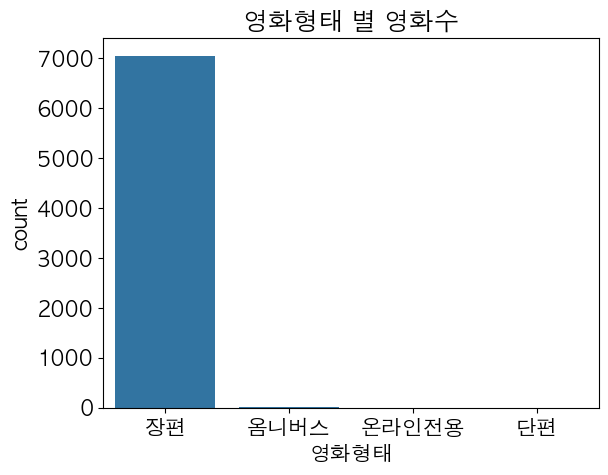

In [29]:
sns.countplot(df, x="영화형태")
plt.title("영화형태 별 영화수")
plt.show()

## 국적

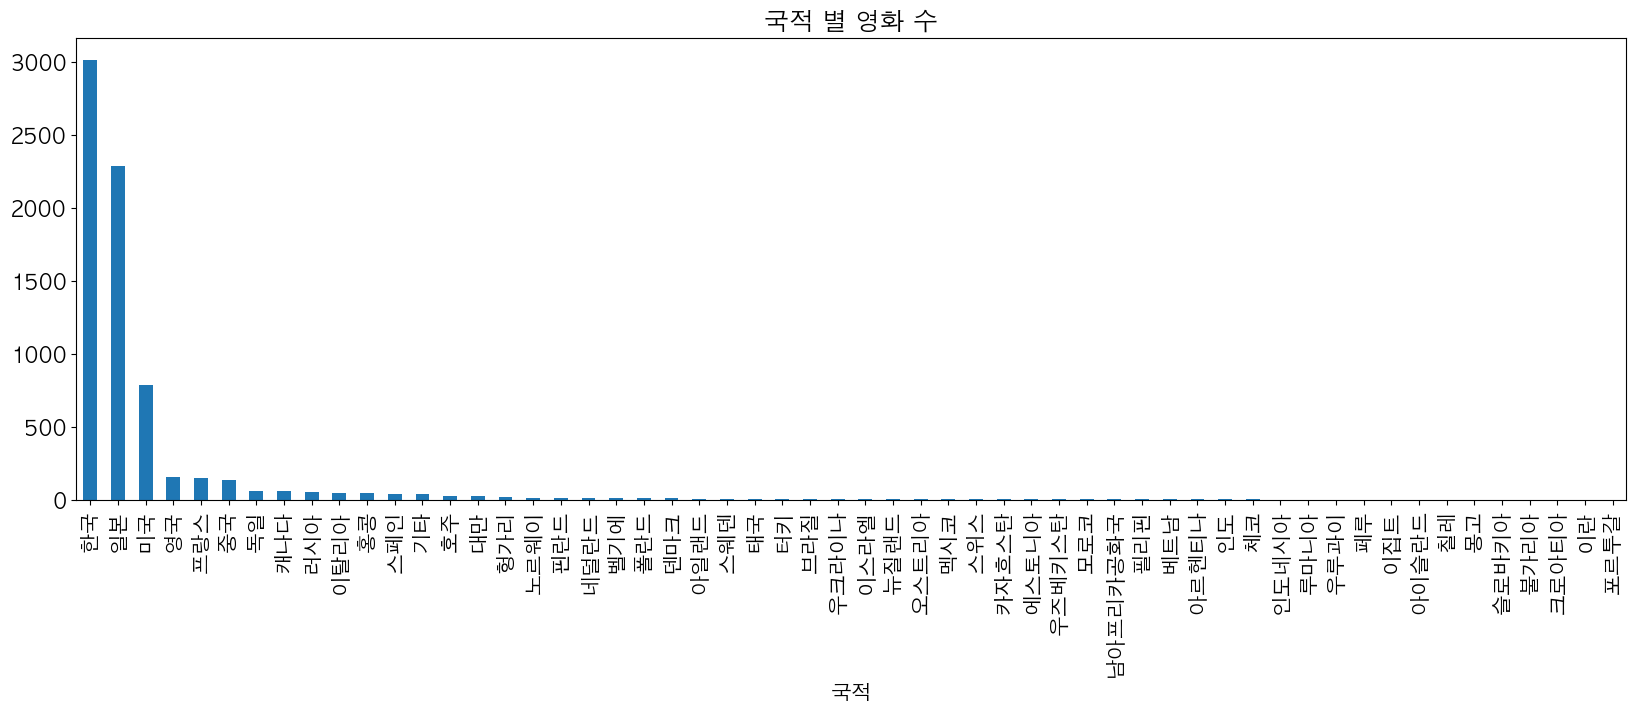

In [30]:
plt.figure(figsize=(20,6))
plt.title("국적 별 영화 수")
df["국적"].value_counts().plot.bar()
plt.show()

In [31]:
df["국적"].value_counts().head(10)

국적
한국      3013
일본      2282
미국       785
영국       153
프랑스      147
중국       133
독일        61
캐나다       59
러시아       52
이탈리아      48
Name: count, dtype: int64

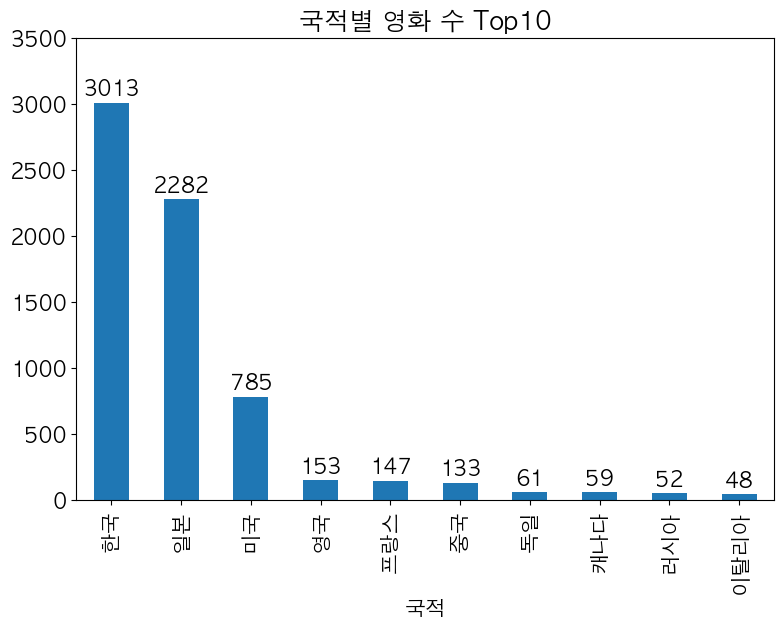

In [32]:
fig, ax = plt.subplots(figsize=(9,6))
df["국적"].value_counts().head(10).plot.bar()
# plt.figure(figsize=(10,6))
for idx, value in enumerate(df["국적"].value_counts().head(10)):
    plt.text(x = idx, # x 위치: 막대의 인데스
             y = value + 50, # y 위치: 막대 높이 + 약간의 간격
             s = value, # 표시할 텍스트(값)
             ha = "center")
plt.ylim(0,3500)
plt.title("국적별 영화 수 Top10")
plt.show()

In [37]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


## 총 스크린수

In [50]:
df["총스크린수"].describe() # 편차가 굉장히 큼

count    6966.000000
mean       63.116853
std       198.104259
min         0.000000
25%         1.000000
50%         1.000000
75%        23.000000
max      2648.000000
Name: 총스크린수, dtype: float64

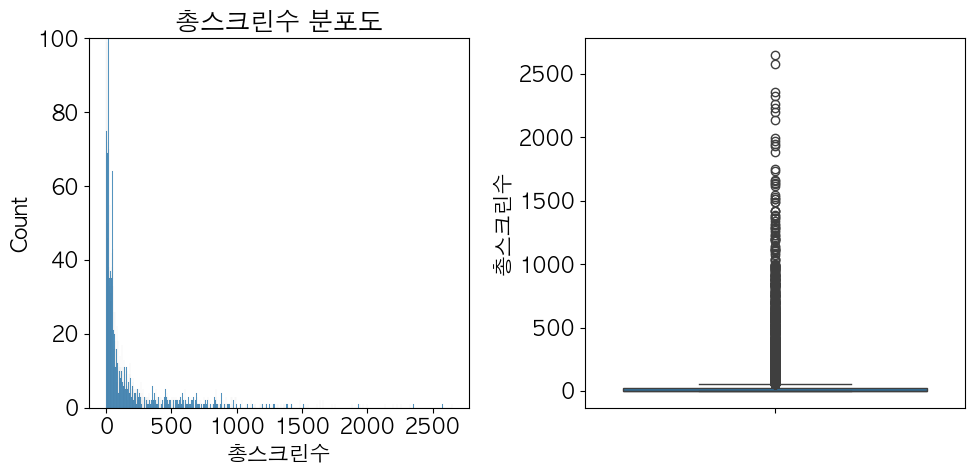

In [69]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=df, x="총스크린수", ax=ax[0])
ax[0].set_ylim([0,100])

sns.boxplot(data=df, y="총스크린수", ax=ax[1])

ax[0].set_title("총스크린수 분포도")
plt.tight_layout()
plt.show()

In [67]:
df[df["총스크린수"]==1] # IPTV에서 "극장 개봉작", "극장 동시 상영작" 등의 타이틀을 달면 IPTV에서 2배에 팔수 있음. <<< 꼼수 개봉
# https://news.kbs.co.kr/news/pc/view/view.do?ncd=4246031 참고

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
102,"주사위놀이, 마불 세계여행",이광범,(주)니즈텔레콤,etc,(주)니즈텔레콤,장편,한국,1.0,43870000.0,7305.0,3744000.0,624.0,어드벤처,전체관람가,일반영화,2024,1
200,결혼 전 뚫려버린 순결,etc,(주)이십일세기미디어,etc,(주)이십일세기미디어,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
201,관능 육체 부녀회장의 동정교육,etc,주식회사 피에스앤제이,etc,주식회사 피에스앤제이,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
202,그녀들이 치료해주는 발기부전,etc,etc,etc,와이제이스토리,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
203,명탐정 추태에 빠져버린 처자,김피디,(주)이십일세기미디어,etc,(주)이십일세기미디어,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


In [240]:
df[df["장르"].str.contains("성인물")]

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
118,제수씨의 황제 VIP 서비스,etc,etc,etc,(주)씨맥스커뮤니케이션즈,장편,한국,5.0,236000.0,41.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,3
162,존예 며느리의 신음소리,etc,etc,etc,(주)씨맥스커뮤니케이션즈,장편,한국,5.0,236000.0,41.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,2
195,내겐 너무 젊은 장모,etc,(주)씨맥스커뮤니케이션즈,etc,(주)씨맥스커뮤니케이션즈,장편,한국,5.0,236000.0,41.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
200,결혼 전 뚫려버린 순결,etc,(주)이십일세기미디어,etc,(주)이십일세기미디어,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
201,관능 육체 부녀회장의 동정교육,etc,주식회사 피에스앤제이,etc,주식회사 피에스앤제이,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,A급며느리,양호열,케이제이픽처스,etc,케이제이픽처스,장편,한국,1.0,6000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2020,10
7056,AV배우의 은밀한 사생활,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2020,8
7057,AV 여배우의 직장 체험기,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2020,6
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


In [235]:
mask = df.loc[df["장르"].str.contains("성인물"), "총스크린수"]>1
df.loc[df["장르"].str.contains("성인물"), "총스크린수"][mask] # 1733개중 107개만 총스크린수가 1개가 아니다.

118     5.0
162     5.0
195     5.0
417     5.0
523     5.0
       ... 
6083    5.0
6087    4.0
6088    5.0
6089    4.0
6095    2.0
Name: 총스크린수, Length: 107, dtype: float64

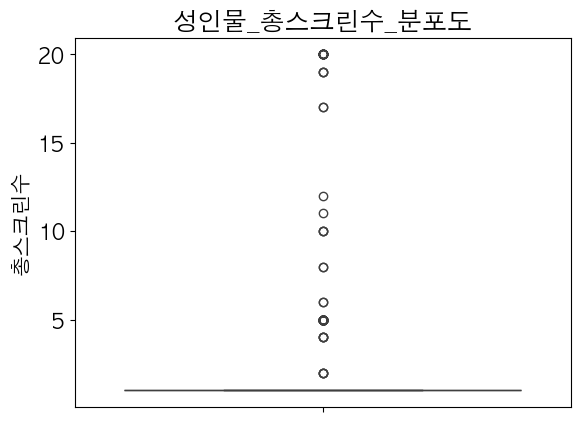

In [238]:
sns.boxplot(data=df.loc[df["장르"].str.contains("성인물")], y="총스크린수")
plt.title("성인물_총스크린수_분포도")
plt.show() # 성인물은 거의다 스크린 수가 1

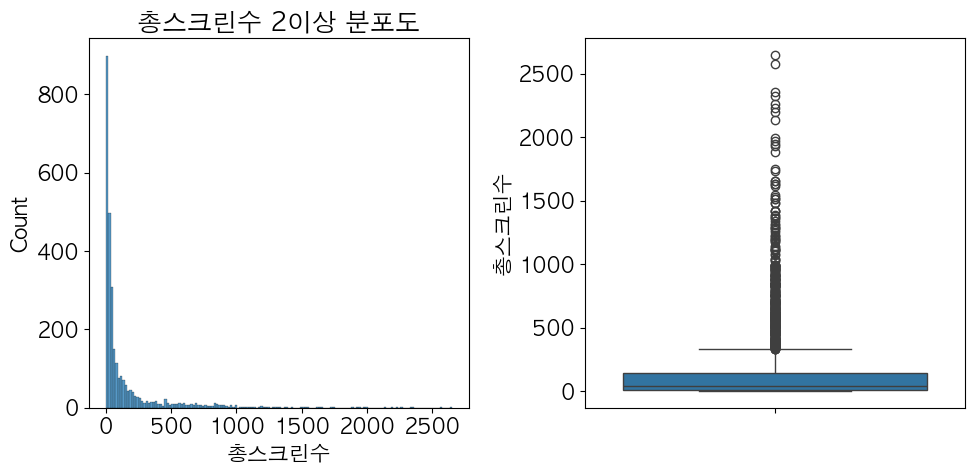

In [72]:
df[df["총스크린수"]>1]

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=df[df["총스크린수"]>1], x="총스크린수", ax=ax[0])
# ax[0].set_ylim([0,100])
sns.boxplot(data=df[df["총스크린수"]>1], y="총스크린수", ax=ax[1])
ax[0].set_title("총스크린수 2이상 분포도")
plt.tight_layout()
plt.show()

## 매출금액

### 매출금액 분포도

In [76]:
df["매출금액"].describe()

count    3.120000e+03
mean     3.701337e+08
std      3.637545e+09
min      1.000000e+03
25%      6.000000e+03
50%      2.360000e+05
75%      1.303188e+07
max      1.279245e+11
Name: 매출금액, dtype: float64

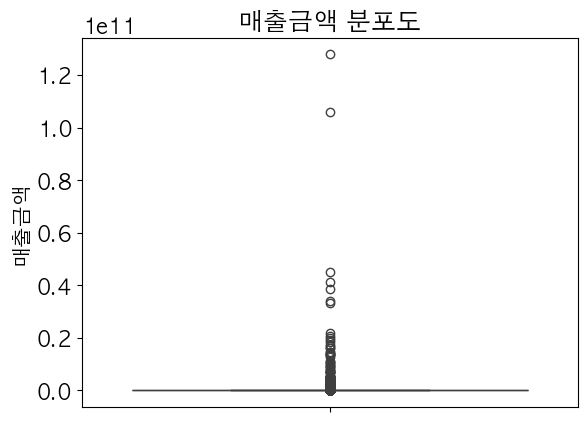

In [112]:
sns.boxplot(data=df, y="매출금액")
# plt.ylim([-1000000,100000000000])
plt.title("매출금액 분포도")
plt.show()

In [155]:
df[(df["매출금액"]<10000) & (df["관람객"]==1)] # 꼼수 개봉같은 경우 때문에 매출도 정확히 잡기는 힘들음

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
4404,교환부부의 세계: 그들만의 은밀한 테크닉,안혜영,영화사 레드카펫,etc,마법사필름,장편,한국,1.0,1000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2021,5
4405,그녀의 속사정:과거는 묻지마세요,하마노 사치,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2021,5
4406,남의 아내를 탐하다 무삭제판,사노 B사쿠,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2021,5
4407,남친 옆에서 정사,이치고 타로와,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2021,5
4408,남편보다 힘쎈 택배기사,김환,(주)영화사가을,etc,(주)영화사가을,장편,한국,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


### 매출금액_관람객_상관도

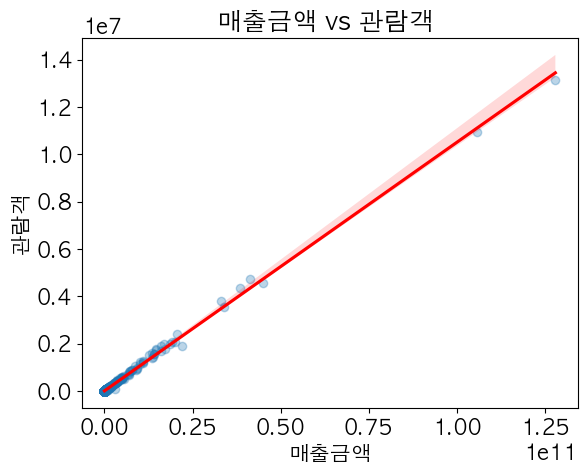

In [131]:
sns.regplot(data=df, x="매출금액", y="관람객", scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("매출금액 vs 관람객 ")
plt.show()

### 등급에 따른 매출 분포도

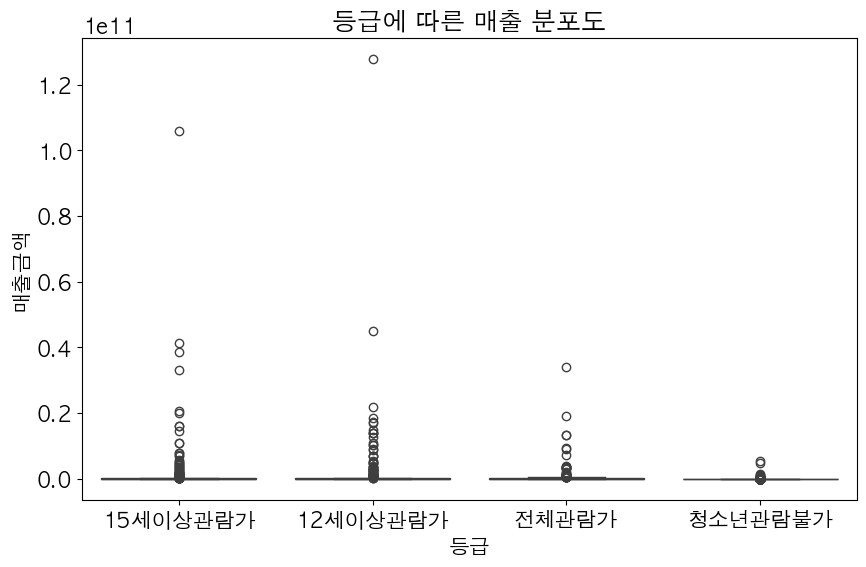

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="등급", y="매출금액")
plt.title("등급에 따른 매출 분포도")
plt.show()

### 전체매출_서울매출_상관도

<Axes: xlabel='매출금액', ylabel='서울매출금액'>

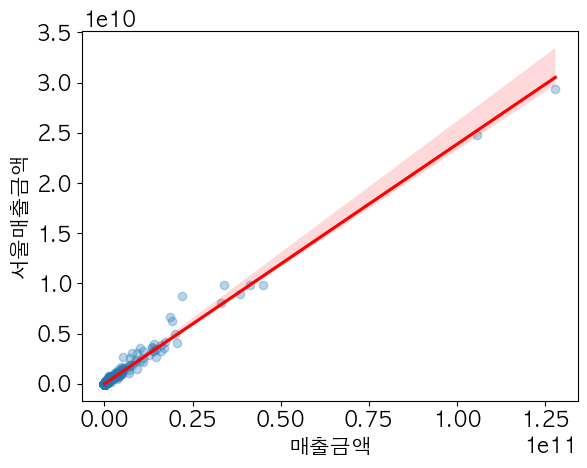

In [139]:
sns.regplot(data=df, x="매출금액", y="서울매출금액", scatter_kws={"alpha":0.3}, line_kws={"color":"red"})

### 장르별 매출 분포도

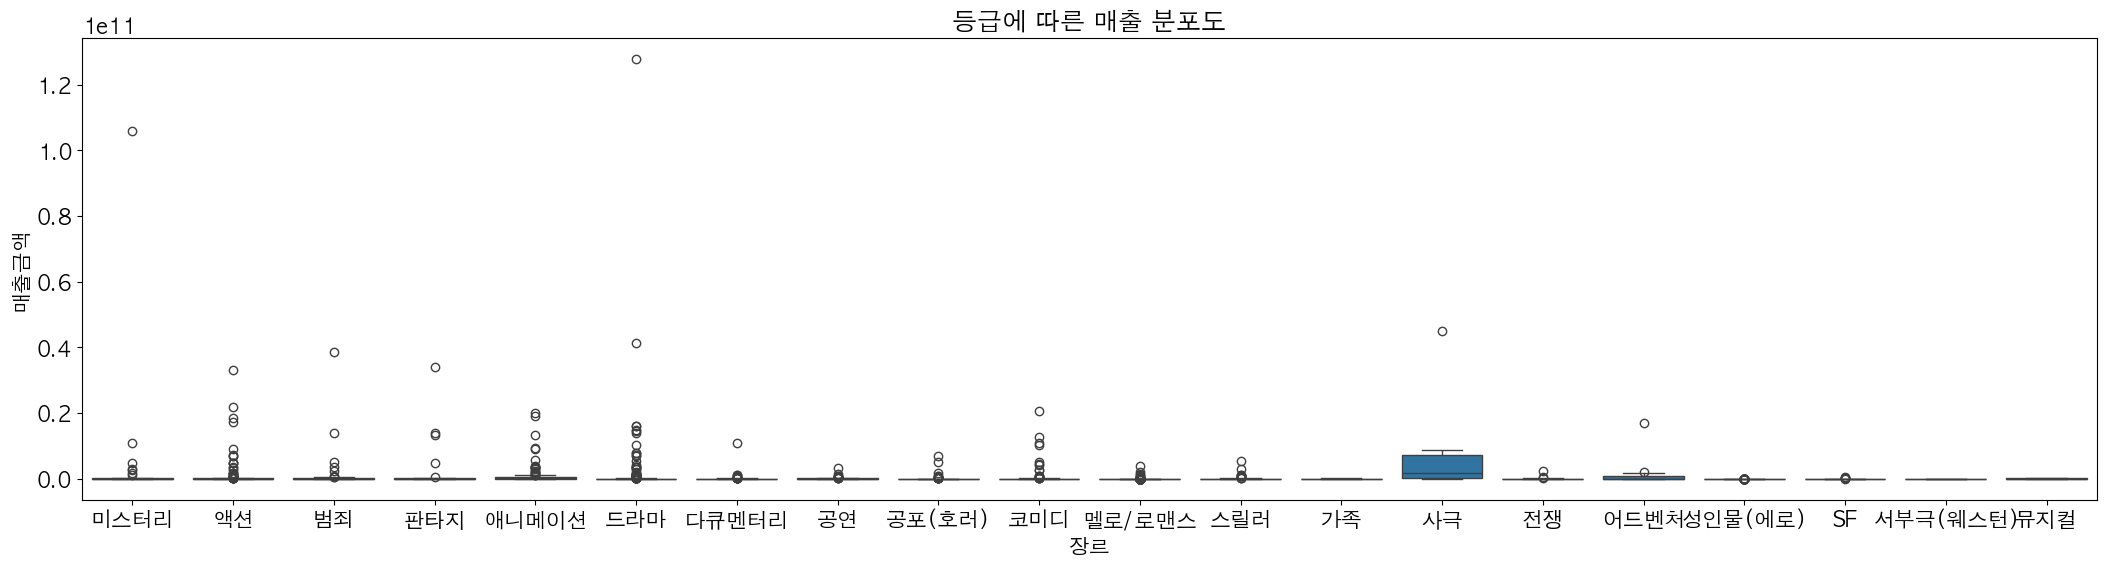

In [143]:
plt.figure(figsize=(26,6))
sns.boxplot(data=df, x="장르", y="매출금액")
plt.title("등급에 따른 매출 분포도")
plt.show()

## 관람객

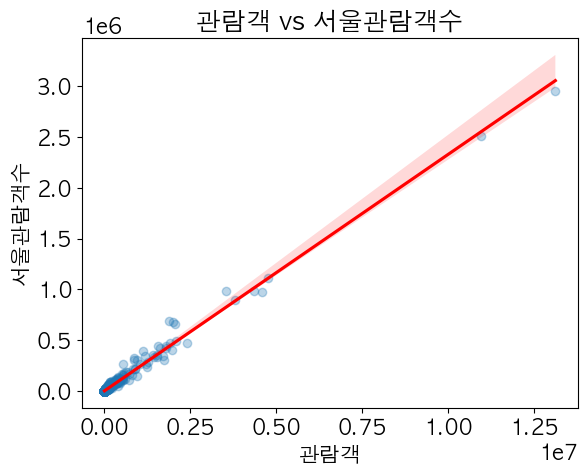

In [149]:
sns.regplot(data=df, x="관람객", y="서울관람객수", scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("관람객 vs 서울관람객수")
plt.show()

## 장르

### 장르별 영화 수

(0.0, 2250.0)

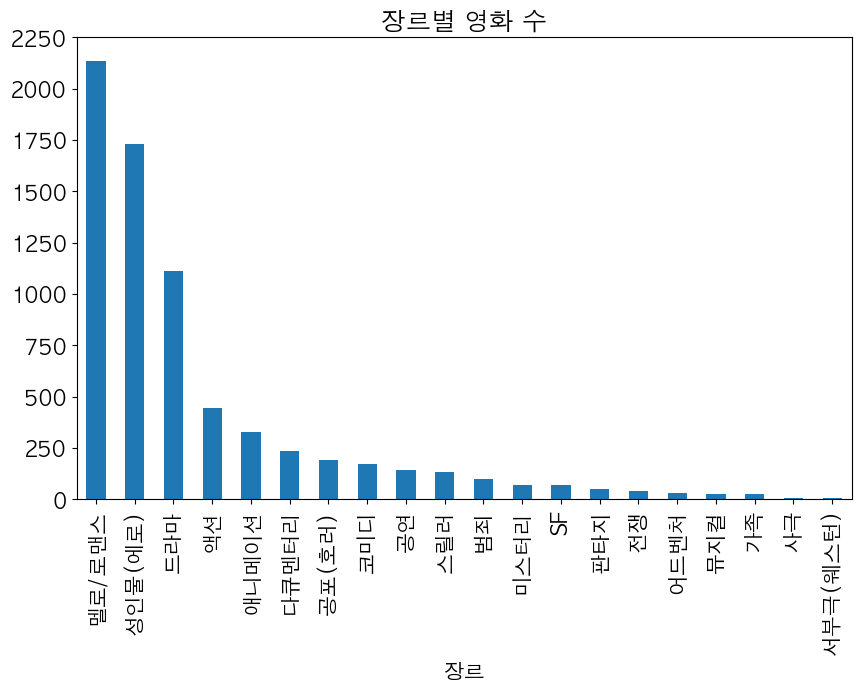

In [163]:
fig, ax = plt.subplots(figsize=(10,6))
df["장르"].value_counts().plot.bar()
plt.title("장르별 영화 수")
plt.ylim([0,2250]) # 사극, 서부극 영화 수 극소수

### 장르별 매출금액 합산

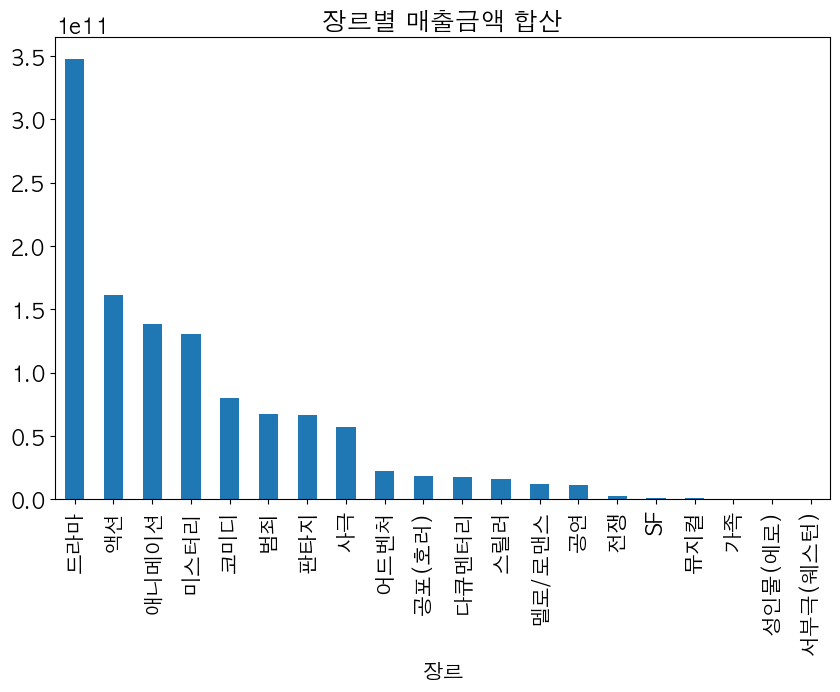

In [183]:
fig, ax = plt.subplots(figsize=(10,6))
df.groupby("장르")["매출금액"].sum().sort_values(ascending=False).plot.bar()
plt.title("장르별 매출금액 합산")

plt.show()

### 장르별 평균 매출금액

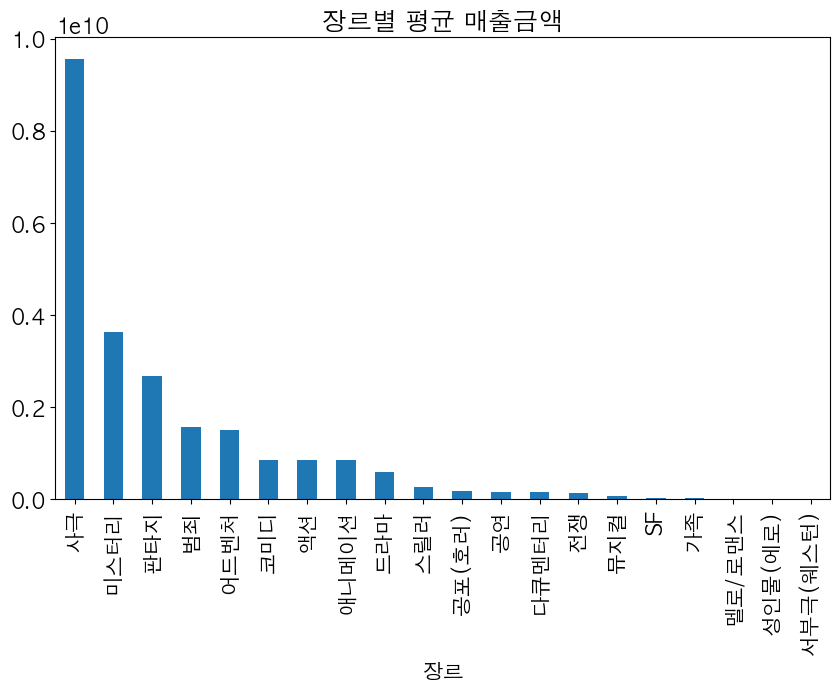

In [182]:
fig, ax = plt.subplots(figsize=(10,6))
df.groupby("장르")["매출금액"].mean().sort_values(ascending=False).plot.bar()
plt.title("장르별 평균 매출금액")

plt.show()

- 최다 장르가 "멜로/로맨스"인데 평균 매출및, 합산이 너무 많길래 봤더니, 에로물 영화가 멜로/로맨스에 들어가 있는 경우가 많음

In [187]:
df[(df["장르"] == "멜로/로맨스") & (df["총스크린수"]==1)]

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
437,가정교사:동정풀이 일타강사,토리피,etc,etc,(주)영진크리에이티브,장편,일본,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2023,9
441,과부형수 안 깊이 넣어준 썰,히로아키,etc,etc,(주)영진크리에이티브,장편,일본,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2023,9
444,그래픽 디자이어,etc,etc,etc,(주)콘텐트마인,장편,영국,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2023,9
447,남편 옆에서 옆집남자 올라탄 썰,우치야마 카즈오,etc,etc,(주)영진크리에이티브,장편,일본,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2023,9
448,남편대신 뚫어준 배관공:시원하게 뚫어드려요,토미죠 타로,etc,etc,(주)영진크리에이티브,장편,일본,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,19금 연애소설 무삭제판,윤준세,(주)영진크리에이티브,etc,(주)영진크리에이티브,장편,한국,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,6
7058,B형물많고화끈한처제,판,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,12
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6000.0,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8


In [219]:
df.loc[df["장르"].isin(["미스터리"]), ["영화제목","장르", "관람객", "총스크린수", "매출금액"]].head(60)
# 미스터리 같은 경우 관객수가 적은 경우 매출금액이 결측치인것이 많아서 평균 매출과, 매출합산순위가, 영화수에 비해 굉장히 높음

,영화제목,장르,관람객,총스크린수,매출금액
0,파묘,미스터리,10957317.0,2355.0,1.057937e+11
44,당신이 잠든 사이,미스터리,3813.0,118.0,3.460788e+07
71,벗어날 탈 脫,미스터리,1125.0,14.0,9.436500e+06
139,클럽 제로,미스터리,4277.0,60.0,3.788752e+07
171,비밀,미스터리,6513.0,126.0,6.598630e+07
219,매트,미스터리,3173.0,9.0,3.782316e+07
229,사형에 이르는 병,미스터리,2040.0,28.0,1.935548e+07
273,오픈 더 도어,미스터리,5246.0,213.0,4.832800e+07
313,잠,미스터리,NaN,NaN,NaN
317,만강홍: 사라진 밀서,미스터리,NaN,153.0,NaN


In [226]:
df.loc[df["장르"] == "다큐멘터리", ["영화제목","장르", "관람객", "총스크린수", "매출금액"]].sort_values("매출금액").head(50)
# 다큐멘터리 같은 경우는 관람객수가 엄청 적은 경우도 많은데 매출금액이 실측이 잡혀서 평균값과 합산이 영화수에 비해 굉장히 낮음

,영화제목,장르,관람객,총스크린수,매출금액
6371,바흐: 숨겨진 작곡가,다큐멘터리,1.0,1.0,2000.0
6988,포르노 스캔들,다큐멘터리,1.0,1.0,5000.0
6066,졸업,다큐멘터리,16.0,12.0,56000.0
5780,본 투 드라이브,다큐멘터리,61.0,4.0,149000.0
5979,디에고,다큐멘터리,20.0,26.0,183000.0
5951,샐린저,다큐멘터리,29.0,21.0,207000.0
5922,소셜노마드,다큐멘터리,56.0,2.0,231000.0
5944,우리를 갈라놓는 것들,다큐멘터리,38.0,15.0,233000.0
5778,"센베노,평창",다큐멘터리,68.0,1.0,261000.0
5937,주전장,다큐멘터리,46.0,56.0,276000.0


# 정리하기
- 제작사
    - 중복되는 데이터 존재
    - 단일 제작, 동시제작이 둘다 있고 동시 제작인 경우, 팀처럼 많이 움직임
- 수입사
    - 동시 수입 영화 있음
    - 50개의 영화가 2개의 수입회사를 사용
- 유통사
    - 동시 유통 하는 경우도 있음
- 국적
    - 굉장히 데이터가 극소수인 나라들 존재
- 장르
    - 감독이 2명이상인경우 옴니버스 형태일 가능성이 있는데, 이럴경우 장르 매기기가 애매함.(기타를 여기에 넣을까 고민)
    - 에로물에 들어가야하는데 멜로/로맨스로 되어 있는 영화가 많음
    - 특정장르(미스터리, 다큐멘터리)들은 결측치들이 많이 잡혀 있어서 데이터의 신뢰성이 떨어짐
- 개봉연도
    - 2017년 영화 삭제
- 영화형태
    - 장편 영화 제외 나머지 형태들은 데이터 매우 부족
- 총 스크린수
    - 스크린 수 1이고 에로물일 경우 꼼수 개봉일 확률 있음
- 매출금액
    - 스크린 수 1인 경우에 의해 이상치 존재